In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [2]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten

/Users/cricket/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
import pickle
with open('../trained_model/indexname.pickle', 'rb') as handle:
    indexname = pickle.load(handle)
    
indexname

{0: 'Chihuahua',
 1: 'Japanese_spaniel',
 2: 'Maltese_dog',
 3: 'Pekinese',
 4: 'Shih-Tzu',
 5: 'Blenheim_spaniel',
 6: 'papillon',
 7: 'toy_terrier',
 8: 'Rhodesian_ridgeback',
 9: 'Afghan_hound',
 10: 'basset',
 11: 'beagle',
 12: 'bloodhound',
 13: 'bluetick',
 14: 'black-and-tan_coonhound',
 15: 'Walker_hound',
 16: 'English_foxhound',
 17: 'redbone',
 18: 'borzoi',
 19: 'Irish_wolfhound',
 20: 'Italian_greyhound',
 21: 'whippet',
 22: 'Ibizan_hound',
 23: 'Norwegian_elkhound',
 24: 'otterhound',
 25: 'Saluki',
 26: 'Scottish_deerhound',
 27: 'Weimaraner',
 28: 'Staffordshire_bullterrier',
 29: 'American_Staffordshire_terrier',
 30: 'Bedlington_terrier',
 31: 'Border_terrier',
 32: 'Kerry_blue_terrier',
 33: 'Irish_terrier',
 34: 'Norfolk_terrier',
 35: 'Norwich_terrier',
 36: 'Yorkshire_terrier',
 37: 'wire-haired_fox_terrier',
 38: 'Lakeland_terrier',
 39: 'Sealyham_terrier',
 40: 'Airedale',
 41: 'cairn',
 42: 'Australian_terrier',
 43: 'Dandie_Dinmont',
 44: 'Boston_bull',
 45:

In [4]:
data = np.load('../trained_model/weights.npz')
weights = data['weights'].tolist()
#weights

In [5]:
class Puppy():
    def __init__(self, num_class=120, weights=weights):
        top_model = ResNet50(include_top=False, weights='imagenet', input_shape = (224, 224, 3),)
        
        with open('../trained_model/indexname.pickle', 'rb') as handle:
            self.indexname = indexname
        
        last_layer = top_model.output
        x = Flatten()(last_layer)
        predictions = Dense(num_class, activation="softmax", name='pred')(x)
        self.model = Model(inputs=top_model.input, outputs = predictions)
        self.model.get_layer('pred').set_weights(weights)
        
        self.target_size = (224, 224)
        
    
    def predict(self, picturepath):
        img = image.load_img(picturepath, target_size=self.target_size)
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0) #To add a dimension
        x = preprocess_input(x)

        #firstlevel = self.firstlevel.predict(x)
        preds = self.model.predict(x)
        
        return preds
    
    def recognize(self, folder='A0 - puppies'):
        filelist = [os.path.join(folder, file) for file in os.listdir('A0 - puppies') if file.endswith('.jpg')]
        if len(filelist) != 0:
            counter = 0
            for file in filelist:
                self.plotbreed(file, counter)
                counter += 1
        else:
            print(f'No pictures in folder {folder}')
    
    def plotbreed(self, picturepath, fileid,  topnumber=3):
        preds = self.predict(picturepath)[0]
        ids = np.argsort(preds)[::-1][:3]
        names = [self.indexname.get(x, '?') for x in ids]
        probas = [preds[x] for x in ids]
        df=pd.DataFrame({'pred': probas}, index = names)
        df = df.sort_values('pred', ascending=False)
        img = mpimg.imread(picturepath)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, tight_layout=True, figsize=(10,5))
        df.plot.barh(ax=ax2, legend=False)
        ax1.imshow(img)
        ax1.figsize=(10,10)
        ax1.axis('off')
        plt.show()
        
        filename = '{:0004d}-{}.png'.format(fileid, names[0])
        
        fig.savefig(os.path.join('A1 - predictions', filename), dpi=100)

puppy = Puppy()

/Users/cricket/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


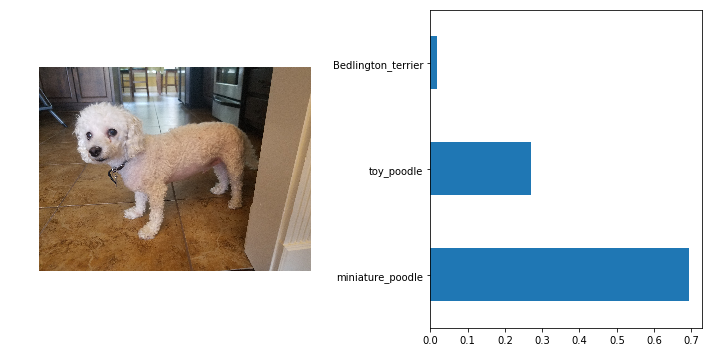

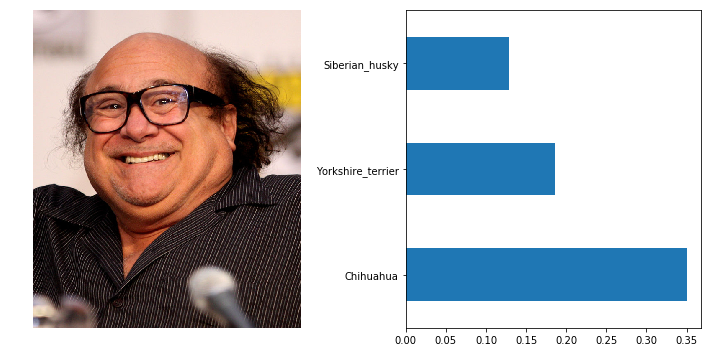

In [6]:
puppy.recognize()